In [3]:
import pandas as pd 
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as  plt 
import cv2
import os
import tensorflow as tf 
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D,Flatten,InputLayer,Input
from tensorflow.keras.callbacks import EarlyStopping,LearningRateScheduler,ModelCheckpoint
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.applications import ResNet152V2,DenseNet121,InceptionResNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import Accuracy,TruePositives,TrueNegatives,FalseNegatives,FalsePositives
from tensorflow.keras.regularizers import L2
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings("ignore")
import glob
import yaml
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import ResNet50

In [5]:
Tumor_brain = "C:/Users/Owen/Downloads/brain_tumor"
yes = "C:/Users/Owen/Downloads/brain_tumor/yes"
no = "C:/Users/Owen/Downloads/brain_tumor/no"

# EDA

In [8]:
num_no_files = len([f for f in os.listdir(no) if os.path.isfile(os.path.join(no, f))])
num_yes_files = len([f for f in os.listdir(yes) if os.path.isfile(os.path.join(yes, f))])

print(f"Number of files in 'No_label': {num_no_files}")
print(f"Number of files in 'Yes_label': {num_yes_files}")

Number of files in 'No_label': 98
Number of files in 'Yes_label': 155


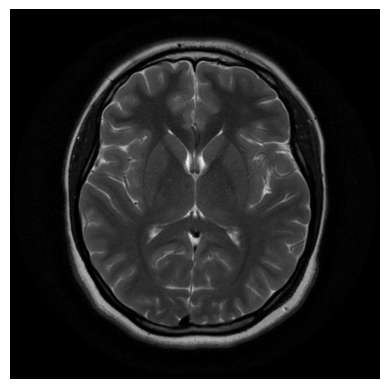

In [10]:
no_images=glob.glob("C:/Users/Owen/Downloads/brain_tumor/no/*")
yes_images=glob.glob( "C:/Users/Owen/Downloads/brain_tumor/yes/*")
img = cv2.imread(no_images[0]) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(img)
plt.axis("off") 
plt.show()

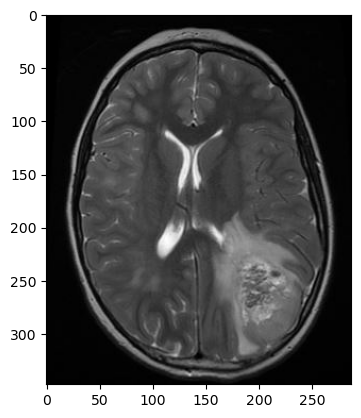

In [12]:
img = cv2.imread(yes_images[2])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [14]:
img.shape

(348, 287, 3)

In [16]:
resolusi_ya = glob.glob("C:/Users/Owen/Downloads/brain_tumor/yes/*")
for image in resolusi_ya :
    img = cv2.imread(image)
    if img is not None :
        height, width, _ = img.shape
        print(f"Gambar: {image}, Resolusi: {width}x{height}")

Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y1.jpg, Resolusi: 180x218
Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y10.jpg, Resolusi: 319x360
Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y100.JPG, Resolusi: 287x348
Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y101.jpg, Resolusi: 300x336
Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y102.jpg, Resolusi: 587x630
Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y103.jpg, Resolusi: 825x993
Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y104.jpg, Resolusi: 700x890
Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y105.jpg, Resolusi: 205x246
Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y106.jpg, Resolusi: 200x253
Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y107.jpg, Resolusi: 512x512
Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y108.jpg, Resolusi: 1059x1200
Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y109.JPG, Resolusi: 258x279
Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y11.jpg, Resolusi: 400x369
Gambar: C:/Use

In [18]:
def image_statistic(image_path) :
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is not None :
        a = np.mean(img)
        b = np.median(img)
        c = np.std(img)
        return a,b,c
    return None

for img_path in resolusi_ya :
    stats = image_statistic(img_path)
    if stats is not None:
        mean, median, std_dev = stats
        print(f"Gambar: {img_path}, Mean: {mean:.2f}, Median: {median:.2f}, Std Dev: {std_dev:.2f}")

Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y1.jpg, Mean: 75.79, Median: 79.00, Std Dev: 69.48
Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y10.jpg, Mean: 109.89, Median: 121.00, Std Dev: 64.42
Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y100.JPG, Mean: 51.96, Median: 59.00, Std Dev: 44.37
Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y101.jpg, Mean: 51.24, Median: 54.00, Std Dev: 57.13
Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y102.jpg, Mean: 74.95, Median: 84.00, Std Dev: 53.14
Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y103.jpg, Mean: 108.25, Median: 115.00, Std Dev: 66.25
Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y104.jpg, Mean: 94.55, Median: 87.00, Std Dev: 68.10
Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y105.jpg, Mean: 86.86, Median: 71.00, Std Dev: 88.20
Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y106.jpg, Mean: 85.33, Median: 96.00, Std Dev: 62.23
Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y107.jpg, Mean: 46.53, Median: 6.00, Std D

In [20]:
def blur_or_not(image_path, threshold=100):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        laplacian = cv2.Laplacian(img,cv2.CV_64F).var()
        return laplacian
    return None

for img_path in resolusi_ya :
    blur_score = blur_or_not(img_path)
    if blur_score is not None :
        print(f"Gambar: {img_path}, Skor Blur: {blur_score:.2f}")
        if blur_score < 100:  
            print(f"⚠️ Gambar {img_path} mungkin buram!")

Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y1.jpg, Skor Blur: 810.33
Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y10.jpg, Skor Blur: 243.95
Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y100.JPG, Skor Blur: 243.43
Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y101.jpg, Skor Blur: 4033.42
Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y102.jpg, Skor Blur: 71.09
⚠️ Gambar C:/Users/Owen/Downloads/brain_tumor/yes\Y102.jpg mungkin buram!
Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y103.jpg, Skor Blur: 49.10
⚠️ Gambar C:/Users/Owen/Downloads/brain_tumor/yes\Y103.jpg mungkin buram!
Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y104.jpg, Skor Blur: 738.52
Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y105.jpg, Skor Blur: 2343.74
Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y106.jpg, Skor Blur: 601.22
Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y107.jpg, Skor Blur: 103.74
Gambar: C:/Users/Owen/Downloads/brain_tumor/yes\Y108.jpg, Skor Blur: 52.37
⚠️ Gambar C:/Users/O

In [22]:
from scipy.stats import zscore

# Kumpulkan semua mean intensitas gambar
mean_intensities = []
for img_path in resolusi_ya:
    stats = image_statistic(img_path)
    if stats:
        mean_intensities.append((img_path, stats[0]))

# Hitung Z-score untuk mendeteksi outlier
if mean_intensities:
    paths, means = zip(*mean_intensities)
    z_scores = np.abs(zscore(means))

    for i, score in enumerate(z_scores):
        if score > 2:  # Threshold Z-score, bisa disesuaikan
            print(f"🚨 Outlier terdeteksi: {paths[i]} (Z-score: {score:.2f})")


🚨 Outlier terdeteksi: C:/Users/Owen/Downloads/brain_tumor/yes\Y111.JPG (Z-score: 2.85)
🚨 Outlier terdeteksi: C:/Users/Owen/Downloads/brain_tumor/yes\Y147.JPG (Z-score: 3.42)
🚨 Outlier terdeteksi: C:/Users/Owen/Downloads/brain_tumor/yes\Y167.JPG (Z-score: 2.63)


In [24]:
class_names = ['no','yes']
dataset = tf.keras.utils.image_dataset_from_directory(
    Tumor_brain,
    labels='inferred',
    label_mode='int',
    class_names=class_names,
    color_mode='rgb',
    batch_size=None,
    image_size=(256, 256),
    shuffle=True,
    seed=42
)

Found 253 files belonging to 2 classes.


In [26]:
def splits(dataset,Train_ratio,Val_ratio,Test_ratio):
    
    data_size = len(dataset)
    
    train_dataset = dataset.take(int(data_size*Train_ratio))
    
    val_split_set = dataset.skip(int(data_size*Train_ratio))
    
    val_dataset = val_split_set.take((int(data_size*Val_ratio)))
    
    test_dataset = val_split_set.skip(int(data_size*Test_ratio))
    return train_dataset,val_dataset,test_dataset 

Train_ratio = 0.80 
Val_ratio = .10
Test_ratio = 0.10
train_dataset,val_dataset,test_dataset  = splits(dataset,Train_ratio,Val_ratio,Test_ratio)

print("The length of the train_dataset is  : ",len(train_dataset))
print('The length of the val_dataset is  : ',len(val_dataset))
print('The length of the test_dataset is  : ',len(test_dataset))
      

The length of the train_dataset is  :  202
The length of the val_dataset is  :  25
The length of the test_dataset is  :  26


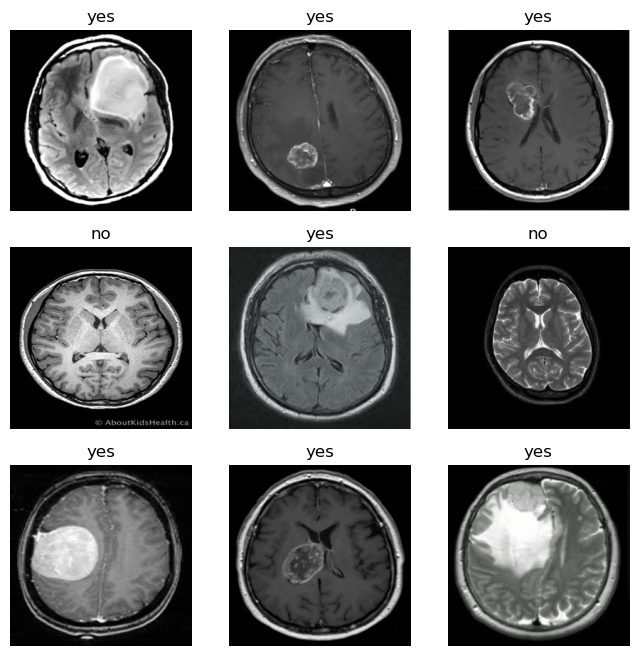

In [28]:
plt.figure(figsize=(8,8))
for i,(image,label) in enumerate(train_dataset.take(9)):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(image/255)
    plt.title(class_names[label])
    plt.axis('off')

In [30]:
def resize_rescaling(image,label):    
    return tf.image.resize(image,(224,224))/255,label

In [32]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

In [34]:
train_dataset = (
             train_dataset
            .shuffle(reshuffle_each_iteration=True,buffer_size=8)
            .map(resize_rescaling)
            .batch(10)
            .prefetch(tf.data.AUTOTUNE)
)

In [36]:
val_dataset = (
             val_dataset
            .shuffle(reshuffle_each_iteration=True,buffer_size=8)
            .map(resize_rescaling)
            .batch(3)
            .prefetch(tf.data.AUTOTUNE)
)

In [38]:
test_dataset = (
             test_dataset
            .shuffle(reshuffle_each_iteration=True,buffer_size=8)
            .map(resize_rescaling)
            .batch(1)
            .prefetch(tf.data.AUTOTUNE)
)

In [172]:
Lenet_model = tf.keras.Sequential([
    InputLayer(shape=(224,224,3)),
    Conv2D(filters=32, kernel_size=3,strides=2,padding='valid',activation='relu',kernel_regularizer=L2(0.01)),
    Dropout(0.4),
    BatchNormalization(),
    MaxPooling2D(pool_size=3,strides=2),
    Conv2D(filters=32,kernel_size=3,strides=2,padding='valid',activation='relu',kernel_regularizer=L2(0.01)),
    BatchNormalization(),
    MaxPooling2D(pool_size=3,strides=1),
    Conv2D(filters=32,kernel_size=3,strides=2,padding='valid',activation='relu',kernel_regularizer=L2(0.01)),
    BatchNormalization(),
    MaxPooling2D(pool_size=3,strides=1),
    Dropout(0.4),
    Flatten(),
    Dense(64,activation='relu'),
    BatchNormalization(),
    Dense(64,activation='relu'),
    BatchNormalization(),
    Dense(1,activation='sigmoid')],name='Lenet_model')
Lenet_model.summary()

Model: "Lenet_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 111, 111, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 27, 27, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 27, 27, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 12, 12, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 64)             │       204,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 229,377 (896.00 KB)

 Trainable params: 228,929 (894.25 KB)

 Non-trainable params: 448 (1.75 KB)

In [174]:
Lenet_model.compile(loss = BinaryCrossentropy(),
                   optimizer=Adam(learning_rate=0.001),
                   metrics = ['accuracy'])

In [42]:
checkpoint_path = "/kaggle/working/best_model.keras"  # Change the extension to .h5
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,  # Corrected parameter name and file extension
    monitor='val_loss',  # Metric to monitor
    save_best_only=True,  # Save only the best model
    mode='min',  # 'min' for loss, 'max' for accuracy
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5, 
    verbose=1,
    mode='auto',
    restore_best_weights=True
)

In [99]:
history = Lenet_model.fit(train_dataset,
                          validation_data=val_dataset,
                          epochs=30,
                          verbose=1,
                          callbacks = [checkpoint_callback,
                                      early_stopping ])

Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.5446 - loss: 1.5589
Epoch 1: val_loss improved from inf to 1.42700, saving model to /kaggle/working/best_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - accuracy: 0.5473 - loss: 1.5539 - val_accuracy: 0.4800 - val_loss: 1.4270
Epoch 2/30
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.7286 - loss: 1.2738
Epoch 2: val_loss improved from 1.42700 to 1.34268, saving model to /kaggle/working/best_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - accuracy: 0.7258 - loss: 1.2756 - val_accuracy: 0.5600 - val_loss: 1.3427
Epoch 3/30
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.7610 - loss: 1.1958
Epoch 3: val_loss improved from 1.34268 to 1.31944, saving model to /kaggle/working/best_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - accuracy: 0.7594 - loss: 1.1969 - val_accuracy: 0.5200 - val_loss: 1.3194
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.7451 - loss: 1.1416
Epoch 

In [46]:
def evaluate_model(model,dataset):
    
    loss = model.history.history['loss']
    val_loss = model.history.history['val_loss']
    accuracy = model.history.history['accuracy']
    val_accuracy = model.history.history['val_accuracy']
    
    plt.figure(figsize=(14,12))
    
    # Plot model loss 
    plt.subplot(2,2,1)
  
    plt.plot(val_loss)
    plt.title("Model Loss")
    plt.xlabel("Epochs")
    plt.ylabel('Loss')
    plt.legend(['train_loss','val_loss'])
    plt.grid()

    # Plot model accuracy
    plt.subplot(2,2,2)
   
    plt.plot(accuracy)
    plt.plot(val_accuracy)
    plt.title("Model Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel('Accuracy')
    plt.legend(['train_accuracy','val_accuracy'])
    plt.grid()
    
    # confusion matrix
    plt.subplot(2,2,3)
    img = []
    labels = []
    for x,y in dataset:
        img.append(x)
        labels.append(y)
    true_label = np.array(labels).flatten()
    predicted = model.predict(np.array(img)[:,0,...])[:,0]
    threshold = 0.5

    cm = confusion_matrix(true_label, predicted > threshold)
    sns.heatmap(cm, annot=True,cmap='Blues',xticklabels=['NO','YES'],yticklabels=['NO','YES'])
    plt.title('Confusion matrix - {}'.format(threshold))
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
    # Plot roc curve
    plt.subplot(2,2,4)

    fp, tp, thresholds = roc_curve(true_label, predicted)
    roc_auc = roc_auc_score(true_label,predicted)
    plt.plot(fp,tp, color='blue',  label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0,1],[0,1],linestyle='--')
    plt.xlabel("False Positive rate")
    plt.ylabel("True Positive rate")

    plt.grid()

    skip = 2

    for i in range(0, len(thresholds), skip):
      plt.text(fp[i], tp[i], thresholds[i])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

In [130]:
evaluate_model(Lenet_model,test_dataset)

KeyError: 'loss'

In [113]:
test_evaluate = Lenet_model.evaluate(test_dataset)
test_evaluate

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4957 - loss: 1.2533  


[1.2684032917022705, 0.3076923191547394]

In [115]:
val_evaluate = Lenet_model.evaluate(val_dataset)
val_evaluate

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5511 - loss: 1.2489 


[1.251397967338562, 0.5199999809265137]

In [58]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint_path = "/kaggle/working/best_model.keras"  # Change the extension to .h5
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,  # Corrected parameter name and file extension
    monitor='val_loss',  # Metric to monitor
    save_best_only=True,  # Save only the best model
    mode='min',  # 'min' for loss, 'max' for accuracy
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5, 
    verbose=1,
    mode='auto',
    restore_best_weights=True
)

mobile = MobileNetV2(input_shape = (224,224,3), include_top = False, weights='imagenet')
mobile.trainable = False

# Build model
inputs = Input(shape=(224,224,3))
X = mobile(inputs)
X = GlobalAveragePooling2D()(X)  # Ganti Flatten
X = Dense(16, activation='relu')(X)
X = BatchNormalization()(X)
X = Dropout(0.3)(X)  # Tambah Dropout
outputs = Dense(1, activation='sigmoid')(X)

mobile_model = Model(inputs, outputs, name='mobile_model')
mobile_model.compile(loss = BinaryCrossentropy(),
                    optimizer=Adam(learning_rate=0.001),
                    metrics=['accuracy'])

mobile_model.fit(train_dataset, 
                 validation_data=val_dataset, 
                 epochs=25, 
                callbacks = [checkpoint_callback, early_stopping])

Epoch 1/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.7125 - loss: 0.6099
Epoch 1: val_loss improved from inf to 0.40914, saving model to /kaggle/working/best_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 495ms/step - accuracy: 0.7136 - loss: 0.6078 - val_accuracy: 0.7600 - val_loss: 0.4091
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.8136 - loss: 0.3930
Epoch 2: val_loss improved from 0.40914 to 0.26015, saving model to /kaggle/working/best_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 339ms/step - accuracy: 0.8149 - loss: 0.3911 - val_accuracy: 0.9600 - val_loss: 0.2602
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.8764 - loss: 0.3149
Epoch 3: val_loss did not improve from 0.26015
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 309ms/step - accuracy: 0.8775 - loss: 0.3136 - val_accuracy: 0.8400 - val_loss: 0.2785
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 0.8841 - loss: 0.2777
Epoch 4: val_loss did not improve from 0.26015
21/21 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


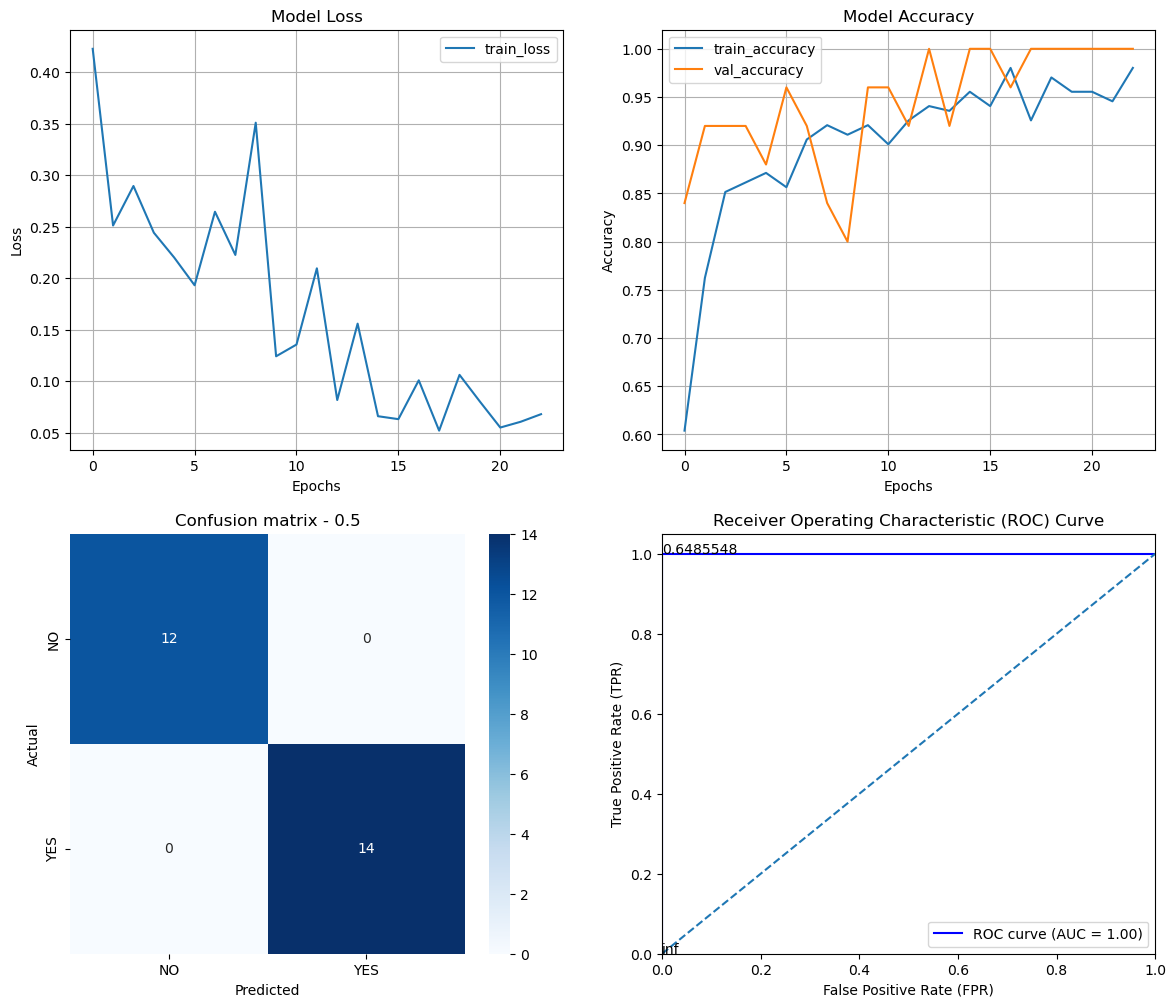

In [307]:
evaluate_model(mobile_model,test_dataset)

In [318]:
test_loss, test_acc = mobile_model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc:.4f}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 1.0000 - loss: 0.0906  
Test Accuracy: 1.0000


In [62]:
B_val = mobile_model.evaluate(val_dataset)
print(f"Validation Accuracy", B_val)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9123 - loss: 0.1304 
Validation Accuracy [0.11093878746032715, 0.9200000166893005]


In [64]:
mobile_model.evaluate(train_dataset)

21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 326ms/step - accuracy: 0.9697 - loss: 0.1106


[0.09292628616094589, 0.9752475023269653]

In [367]:
from tensorflow.keras.applications import EfficientNetB0
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np

Efficient_backbone = EfficientNetB0(input_shape=(224,224,3), include_top=False, weights='imagenet')
Efficient_backbone.trainable = False

inputs = Input(shape=(224,224,3))
X = Efficient_backbone(inputs)
X = GlobalAveragePooling2D()(X)
X = Dense(32, activation='relu')(X) 
X = BatchNormalization()(X)
X = Dropout(0.3)(X)
outputs = Dense(1, activation='sigmoid')(X)
efficient_model = Model(inputs, outputs, name='effientnet_model')

efficient_model.compile(
    loss=BinaryCrossentropy(),
    optimizer = Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

history = efficient_model.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs = 25,
    callbacks = [checkpoint_callback, early_stopping]
)

Epoch 1/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.5005 - loss: 0.7639 
Epoch 1: val_loss did not improve from 0.05194
21/21 ━━━━━━━━━━━━━━━━━━━━ 37s 742ms/step - accuracy: 0.5022 - loss: 0.7624 - val_accuracy: 0.6800 - val_loss: 0.6896
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.4930 - loss: 0.7401 
Epoch 2: val_loss did not improve from 0.05194
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 468ms/step - accuracy: 0.4944 - loss: 0.7398 - val_accuracy: 0.6800 - val_loss: 0.6259
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.5311 - loss: 0.7291
Epoch 3: val_loss did not improve from 0.05194
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 458ms/step - accuracy: 0.5313 - loss: 0.7280 - val_accuracy: 0.5200 - val_loss: 0.6911
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.5520 - loss: 0.7236 
Epoch 4: val_loss did not improve from 0.05194
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 510ms/step - accuracy: 0.5537 - loss: 0.7223 - val_accuracy: 0.4800 - val_loss: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


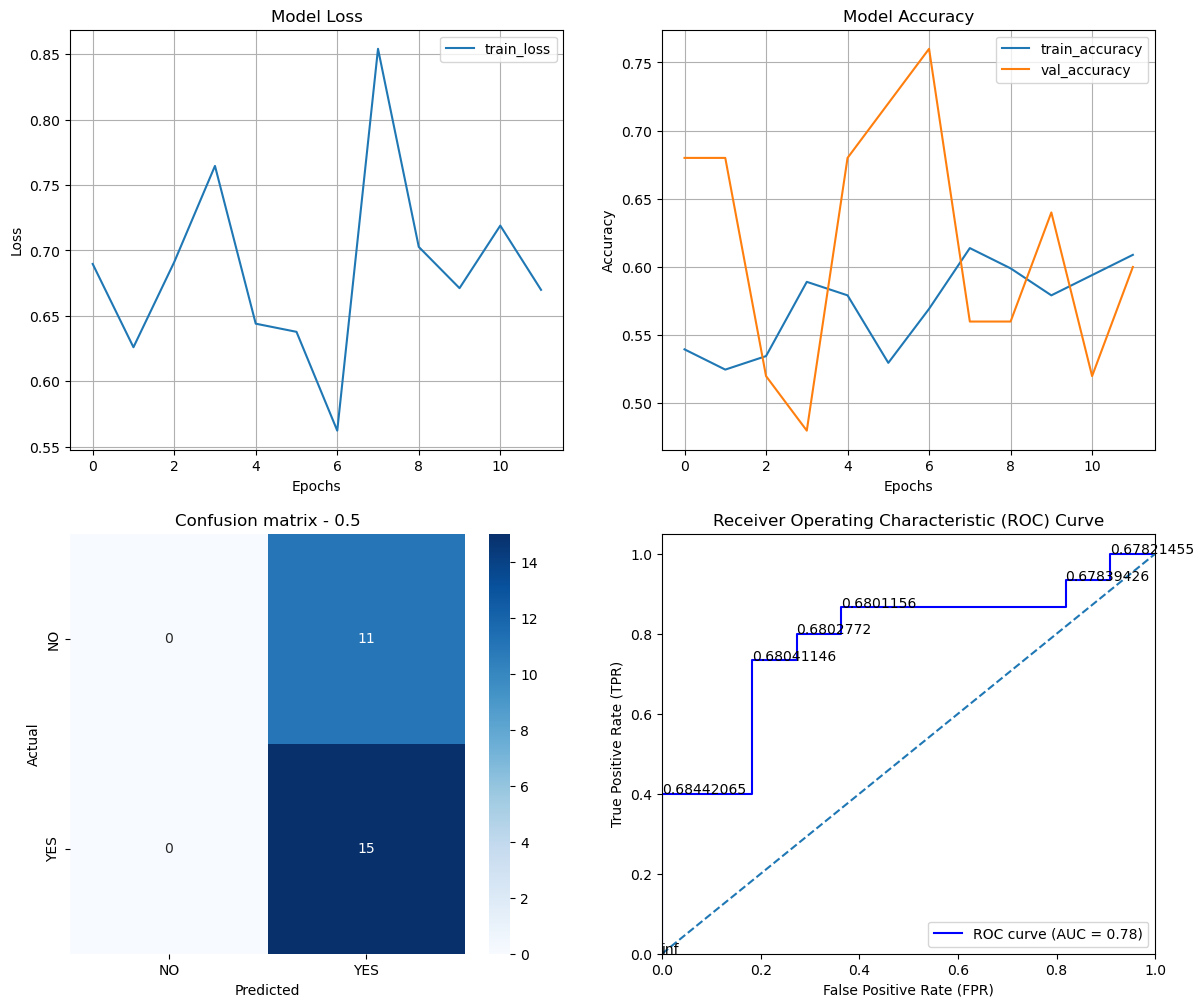

In [369]:
evaluate_model(efficient_model,test_dataset)

In [50]:
test_loss, test_acc = efficient_model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc:.4f}")

NameError: name 'efficient_model' is not defined

In [429]:
from tensorflow.keras.applications import ResNet50
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

Resnet_backbone = ResNet50(input_shape = (224,224,3), include_top=False ,weights='imagenet')
Resnet_backbone.trainable = False
model = Sequential()
model.add(Resnet_backbone)
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='relu'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_110         │ (None, 7, 7, 2048)     │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_171 (Dense)               │ (None, 7, 7, 16)       │        32,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_111         │ (None, 7, 7, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_172 (Dense)               │ (None, 7, 7, 1)        │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,628,769 (90.14 MB)

 Trainable params: 36,929 (144.25 KB)

 Non-trainable params: 23,591,840 (90.00 MB)

In [431]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_dataset, epochs=25, validation_data=val_dataset,callbacks=[early_stopping, checkpoint_callback])

Epoch 1/25


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 7, 7, 1)

In [44]:
resnet_backbone = ResNet50(input_shape=(224,224,3), include_top=False, weights='imagenet')
resnet_backbone.trainable = False

inputs = Input(shape=(224,224,3))
X = resnet_backbone(inputs)
X = GlobalAveragePooling2D()(X)
X = Dense(16, activation='relu')(X) 
X = BatchNormalization()(X)
X = Dropout(0.3)(X)
outputs = Dense(1, activation='sigmoid')(X)
resnet_model = Model(inputs, outputs, name='resnet_model')

resnet_model.compile(
    loss=BinaryCrossentropy(),
    optimizer = Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

history = resnet_model.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs = 25,
    callbacks = [checkpoint_callback, early_stopping]
)

Epoch 1/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 739ms/step - accuracy: 0.6810 - loss: 0.6495 
Epoch 1: val_loss improved from inf to 0.67401, saving model to /kaggle/working/best_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.6795 - loss: 0.6485 - val_accuracy: 0.5200 - val_loss: 0.6740
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 625ms/step - accuracy: 0.7699 - loss: 0.6214 
Epoch 2: val_loss improved from 0.67401 to 0.67045, saving model to /kaggle/working/best_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 803ms/step - accuracy: 0.7694 - loss: 0.6197 - val_accuracy: 0.4400 - val_loss: 0.6704
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 590ms/step - accuracy: 0.7014 - loss: 0.5805 
Epoch 3: val_loss improved from 0.67045 to 0.65995, saving model to /kaggle/working/best_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 763ms/step - accuracy: 0.7017 - loss: 0.5805 - val_accuracy: 0.6400 - val_loss: 0.6599
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 625ms/step - accuracy: 0.7518 - loss: 0.5542 
Ep

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


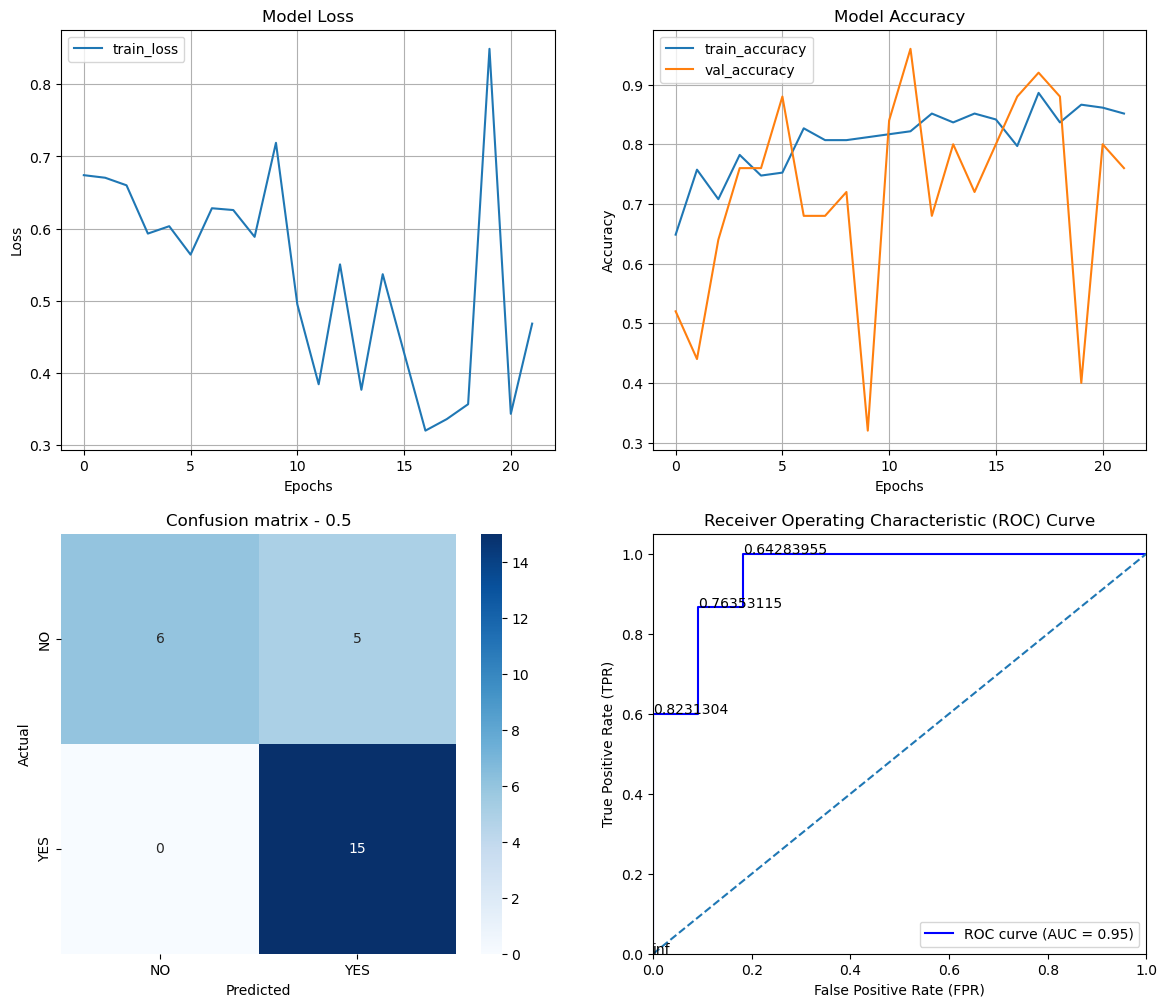

In [48]:
evaluate_model(resnet_model,test_dataset)

In [52]:
test_loss, test_acc = resnet_model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc:.4f}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.6173 - loss: 0.5823     
Test Accuracy: 0.7308


In [54]:
def Tumor_or_Not(x):
    if x<.5:
        return str('no')
    else:
        return str('yes')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


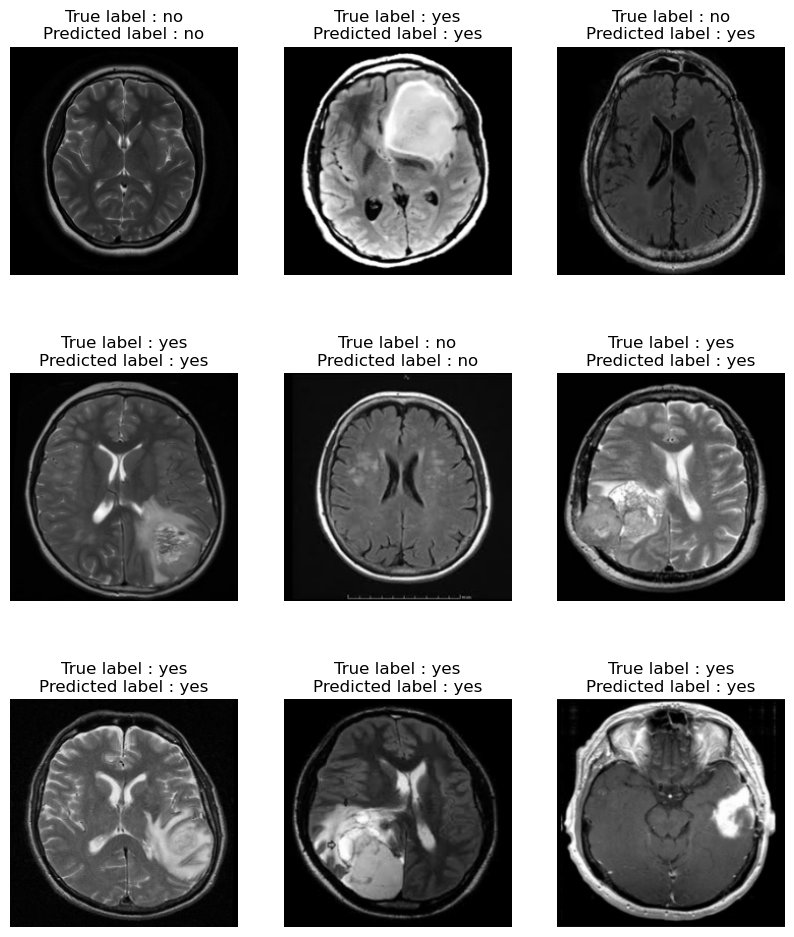

In [56]:
plt.figure(figsize=(10,12))
for i,(image,label) in  enumerate(test_dataset.take(9)):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(image[0])
    plt.title('True label : '+class_names[label[0]]+"\n"+'Predicted label : '+
             Tumor_or_Not(resnet_model.predict(tf.expand_dims(image[0],axis=0))[0][0]))
    plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


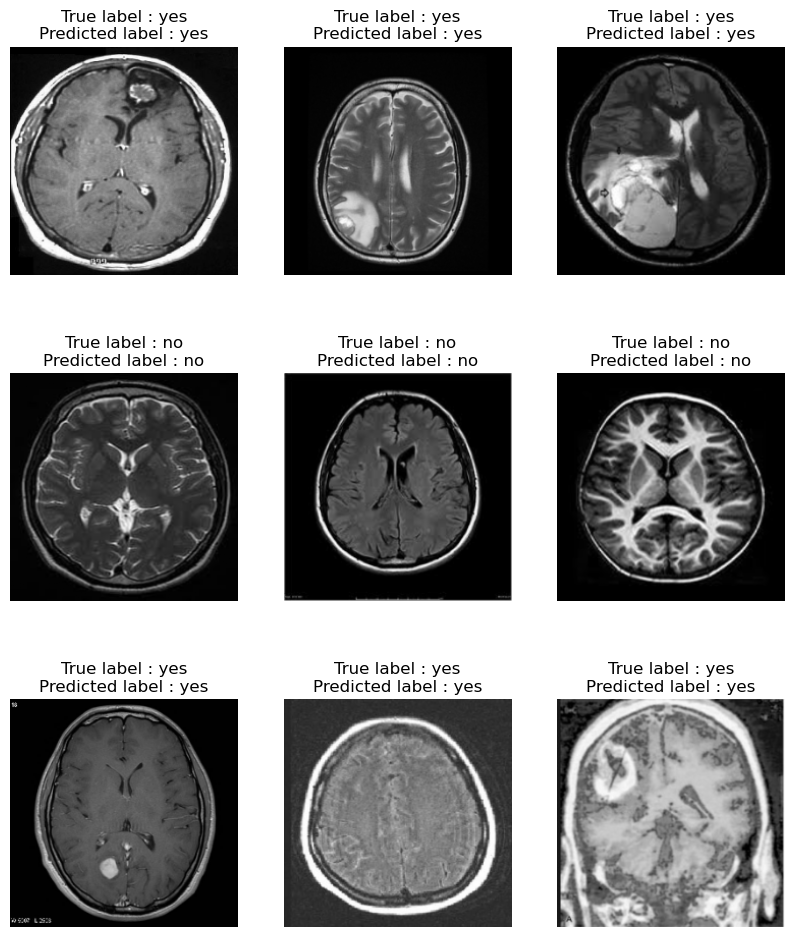

In [60]:
plt.figure(figsize=(10,12))
for i,(image,label) in  enumerate(test_dataset.take(9)):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(image[0])
    plt.title('True label : '+class_names[label[0]]+"\n"+'Predicted label : '+
             Tumor_or_Not(mobile_model.predict(tf.expand_dims(image[0],axis=0))[0][0]))
    plt.axis('off')